<a href="https://colab.research.google.com/github/patience275/marketing/blob/main/marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/marketing/ecommerce_customer_data (1).csv')
df.head()

,customer_id,name,email,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
0,a3071abd-8922-4608-95af-676364cb411d,Erica Powers,houseariana@example.net,56,Male,41672,11,170.75,14,5,0
1,114a0236-61b3-4447-964c-dbe6ac3d0773,Sarah Jones,ufranklin@example.org,46,Female,78217,9,63.17,8,4,0
2,c2fcf312-df91-400a-ab0e-822c1fab051a,Jaime Peterson,james10@example.com,32,Female,28279,10,55.09,8,2,0
3,7885497e-eb68-4c32-b4a3-b110d6af8aae,Rebecca Wolfe,pricedustin@example.org,60,Female,17017,15,110.88,18,4,0
4,b212448f-04ae-4943-a90e-0c8500b486fc,Kenneth Peterson,qwyatt@example.net,25,Male,56600,10,158.37,42,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   object 
 1   name                      1000 non-null   object 
 2   email                     1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   gender                    1000 non-null   object 
 5   annual_income             1000 non-null   int64  
 6   total_purchases           1000 non-null   int64  
 7   avg_purchase_value        1000 non-null   float64
 8   days_since_last_purchase  1000 non-null   int64  
 9   customer_satisfaction     1000 non-null   int64  
 10  churn                     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


In [4]:
df.isna().sum()

,0
customer_id,0
name,0
email,0
age,0
gender,0
annual_income,0
total_purchases,0
avg_purchase_value,0
days_since_last_purchase,0
customer_satisfaction,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['customer_id', 'name', 'email', 'age', 'gender', 'annual_income',
       'total_purchases', 'avg_purchase_value', 'days_since_last_purchase',
       'customer_satisfaction', 'churn'],
      dtype='object')

In [7]:
df=df.drop(columns=['customer_id', 'name', 'email'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   gender                    1000 non-null   object 
 2   annual_income             1000 non-null   int64  
 3   total_purchases           1000 non-null   int64  
 4   avg_purchase_value        1000 non-null   float64
 5   days_since_last_purchase  1000 non-null   int64  
 6   customer_satisfaction     1000 non-null   int64  
 7   churn                     1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


## age

In [9]:
df['age'].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63])

In [10]:
age=df['age'].value_counts()
age

,count
age,
43,33
50,30
45,30
52,28
64,27
54,27
56,25
18,25
62,25


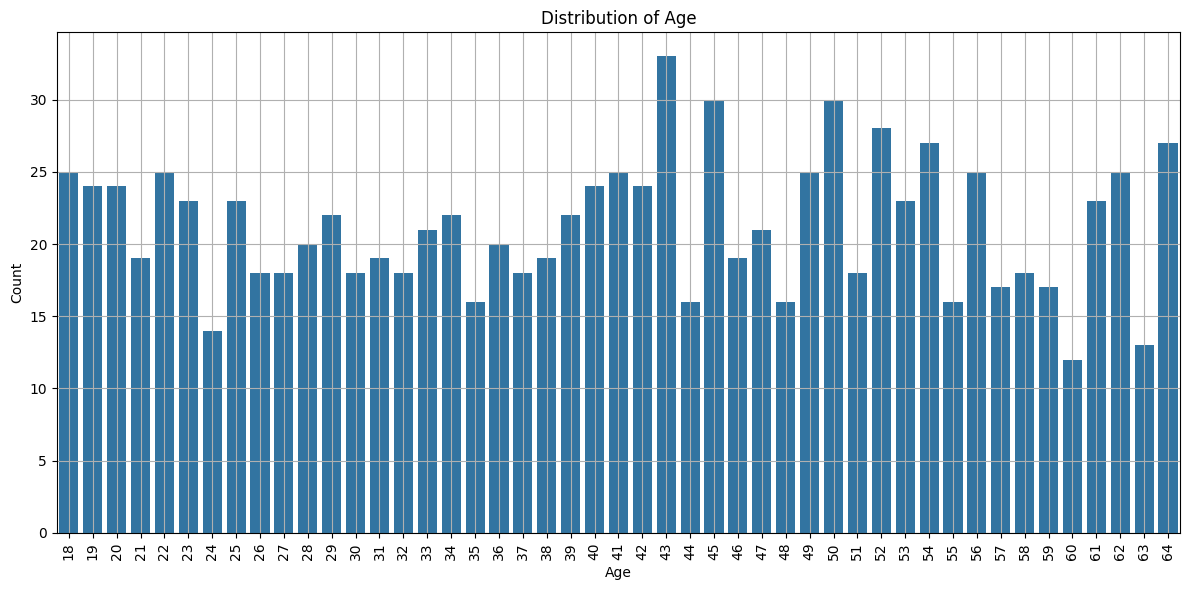

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=age.index, y=age.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

##gender


In [12]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

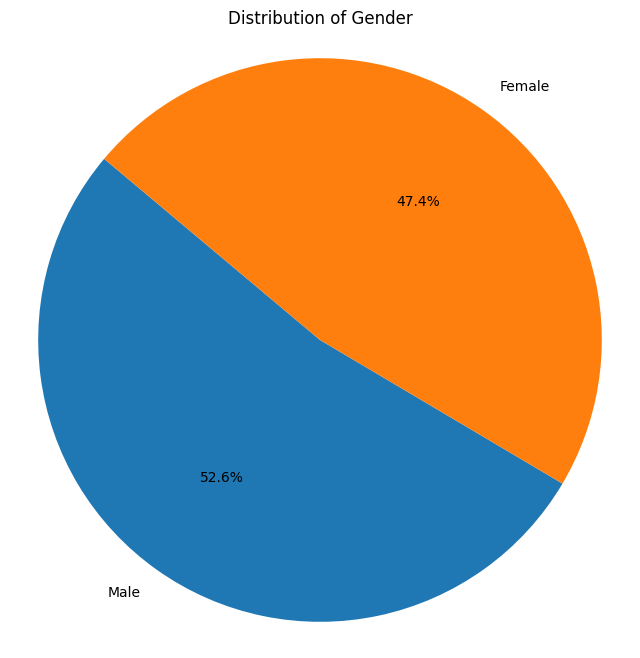

In [13]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

<Figure size 1400x700 with 0 Axes>

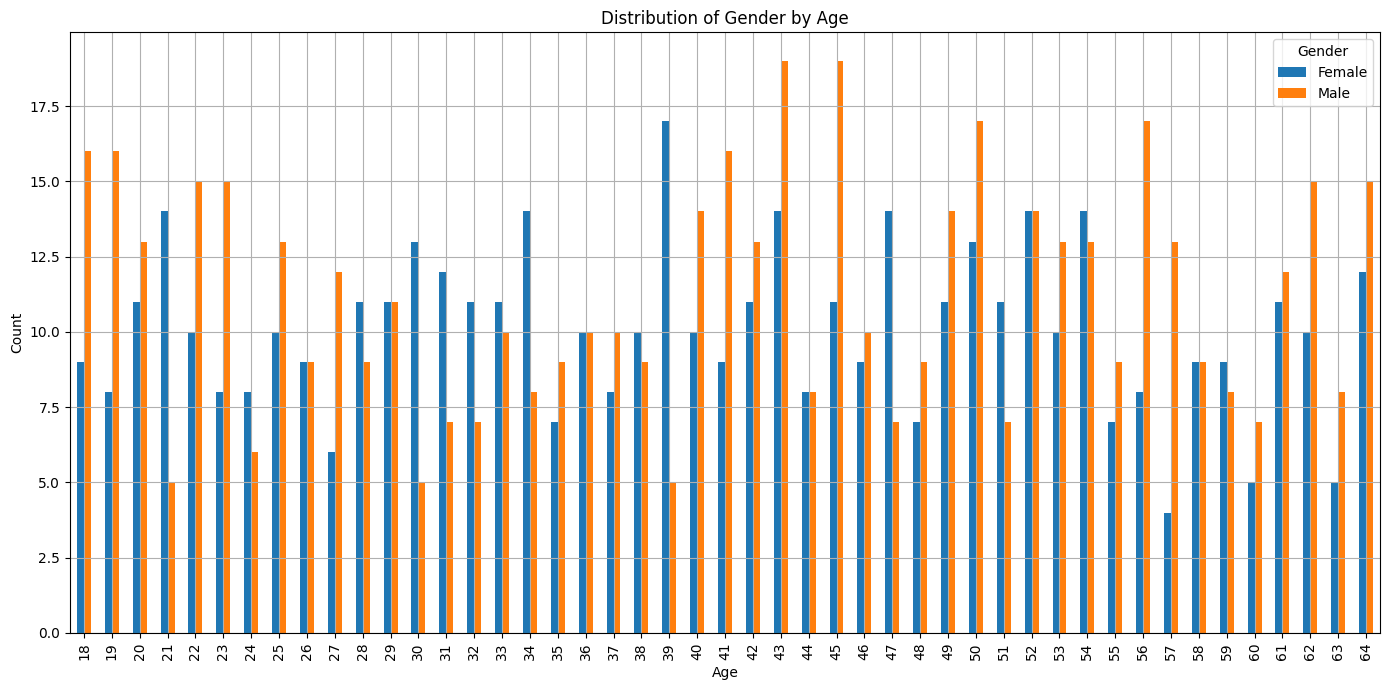

In [14]:
gender_age_counts = df.groupby('age')['gender'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
gender_age_counts.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Distribution of Gender by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## annual income

In [15]:
df['annual_income'].describe()

,annual_income
count,1000.000000
mean,50852.235000
std,15009.184041
min,6179.000000
25%,40770.250000
50%,50631.000000
75%,60796.750000
max,97896.000000


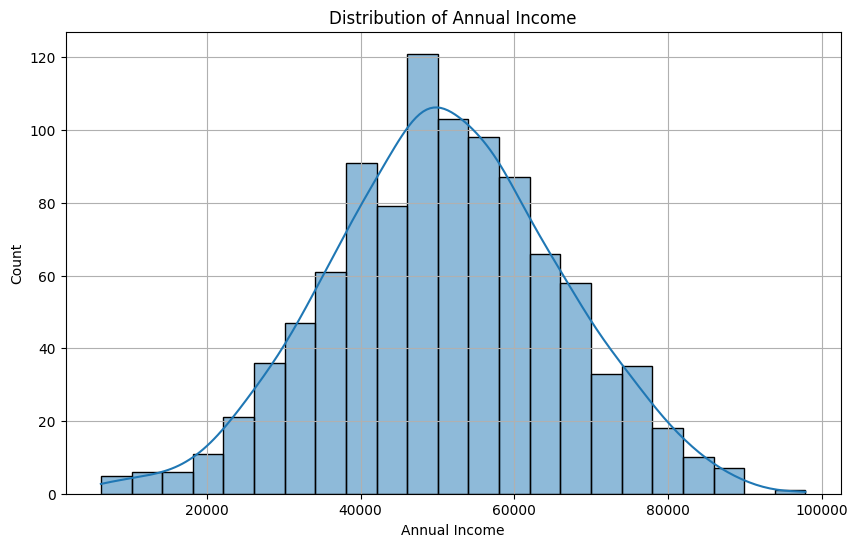

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_income', kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

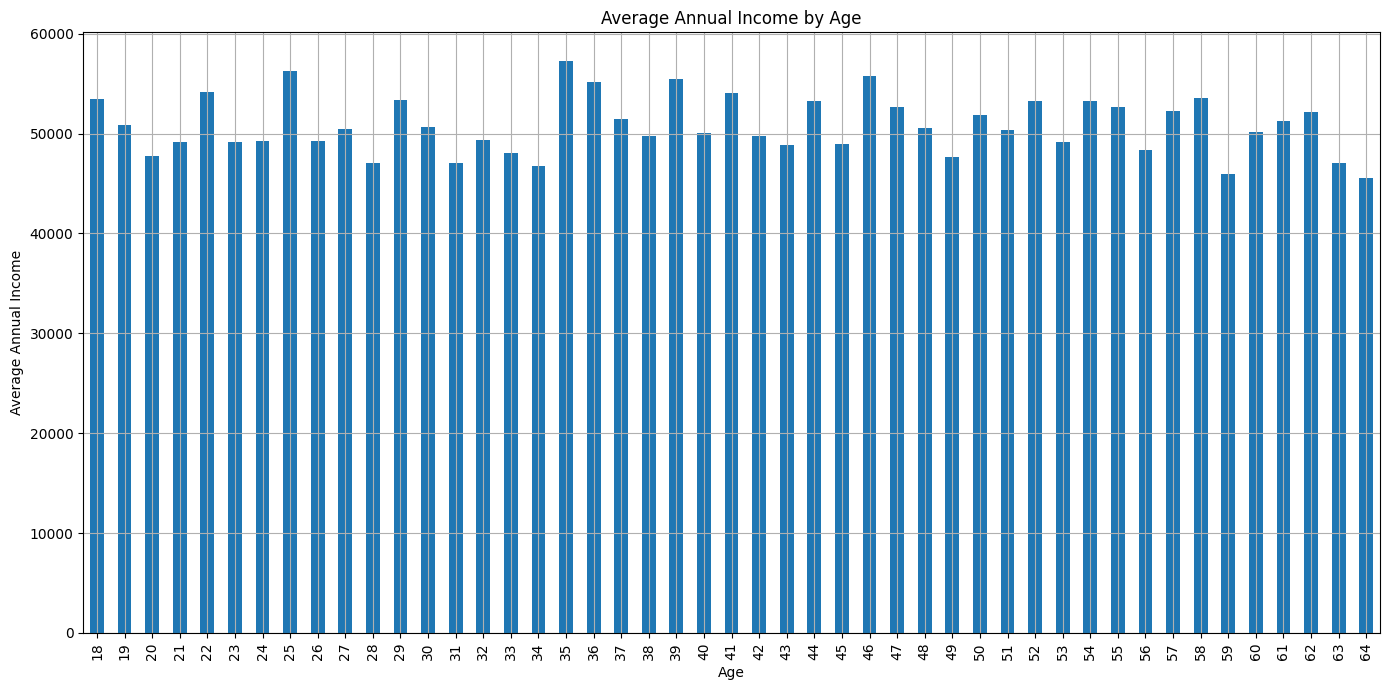

In [17]:
average_income_by_age = df.groupby('age')['annual_income'].mean()

plt.figure(figsize=(14, 7))
average_income_by_age.plot(kind='bar')
plt.title('Average Annual Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Annual Income')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## total purchases

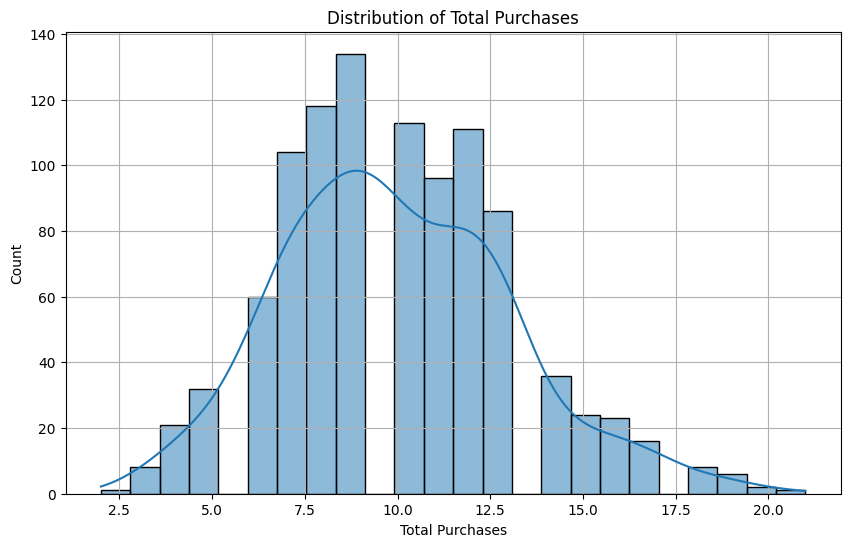

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_purchases', kde=True)
plt.title('Distribution of Total Purchases')
plt.xlabel('Total Purchases')
plt.grid(True)
plt.ylabel('Count')
plt.show()

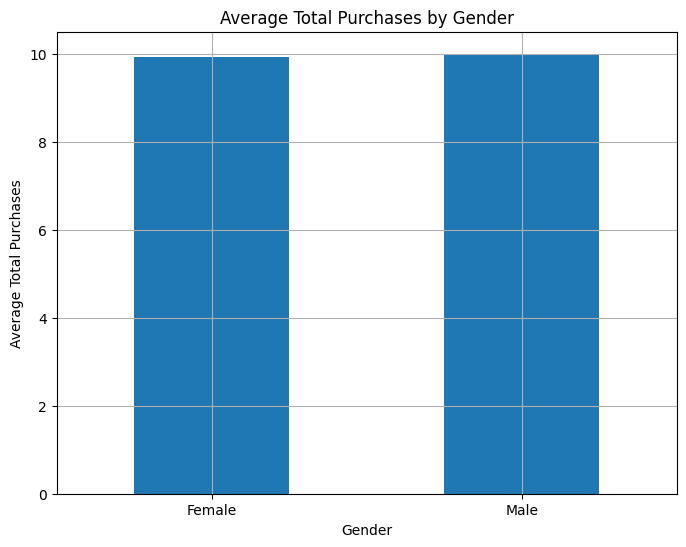

In [19]:
average_purchases_by_gender = df.groupby('gender')['total_purchases'].mean()

plt.figure(figsize=(8, 6))
average_purchases_by_gender.plot(kind='bar')
plt.title('Average Total Purchases by Gender')
plt.xlabel('Gender')
plt.grid(True)
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=0)
plt.show()

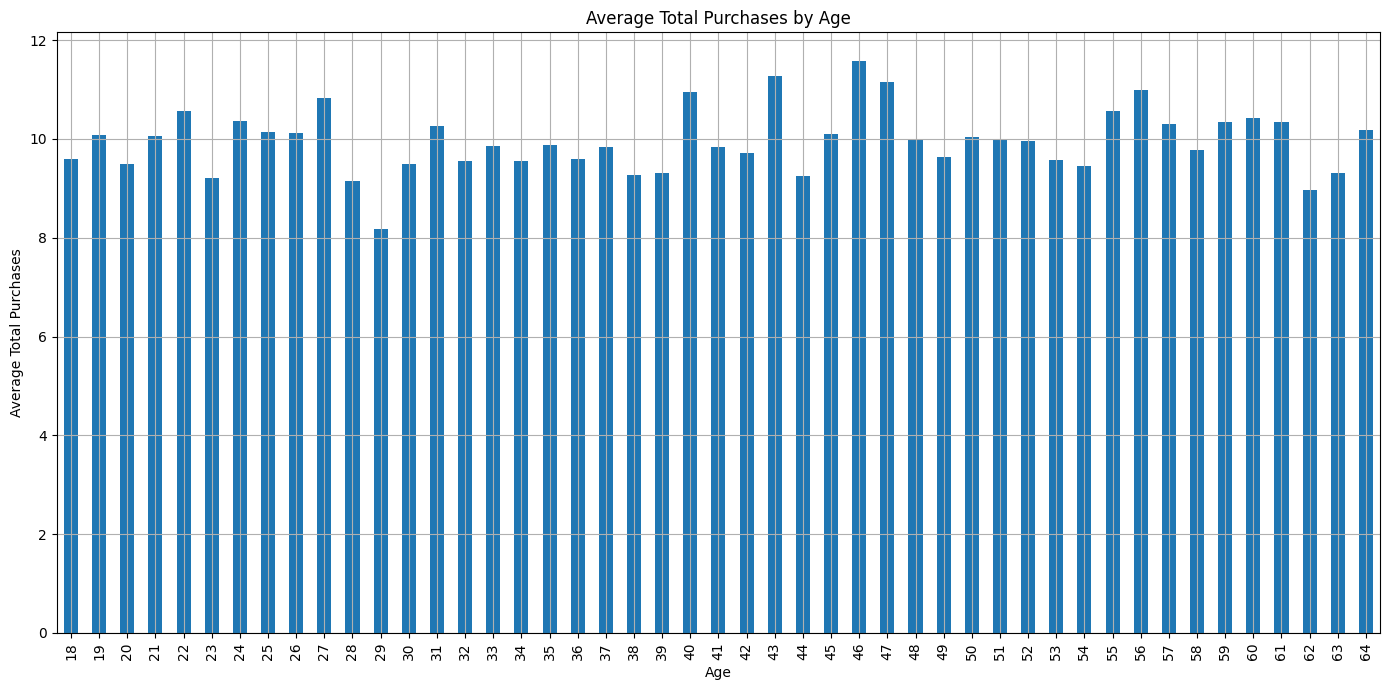

In [20]:
average_purchases_by_age = df.groupby('age')['total_purchases'].mean()

plt.figure(figsize=(14, 7))
average_purchases_by_age.plot(kind='bar')
plt.title('Average Total Purchases by Age')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## average purchase value

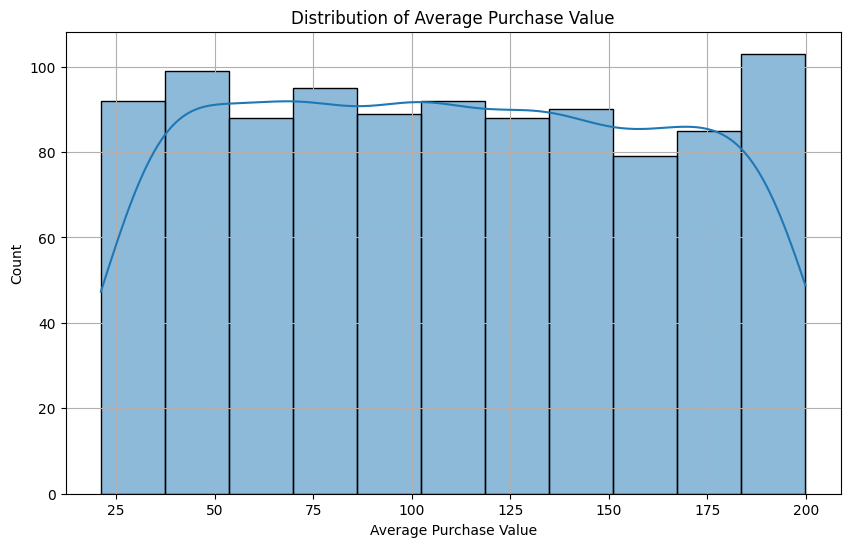

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_purchase_value', kde=True)
plt.title('Distribution of Average Purchase Value')
plt.xlabel('Average Purchase Value')
plt.grid(True)
plt.ylabel('Count')
plt.show()

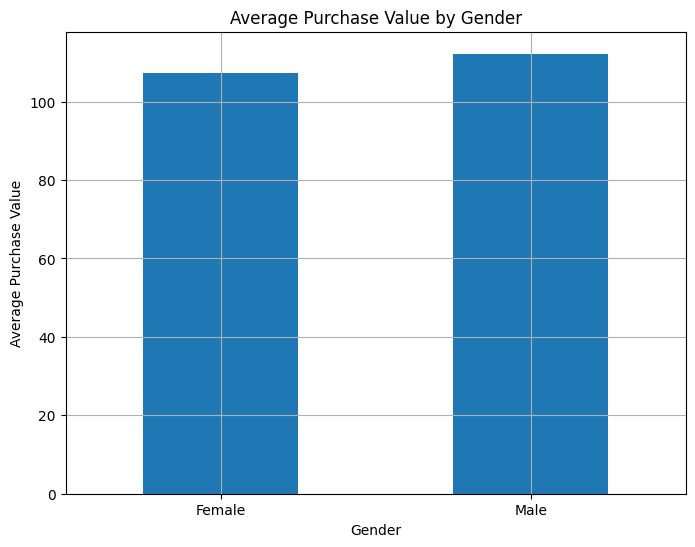

In [22]:
average_purchase_value_by_gender = df.groupby('gender')['avg_purchase_value'].mean()

plt.figure(figsize=(8, 6))
average_purchase_value_by_gender.plot(kind='bar')
plt.title('Average Purchase Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## days since last purchase

In [23]:
df['days_since_last_purchase'].describe()

,days_since_last_purchase
count,1000.000000
mean,28.824000
std,29.470961
min,0.000000
25%,8.000000
50%,19.000000
75%,42.000000
max,225.000000


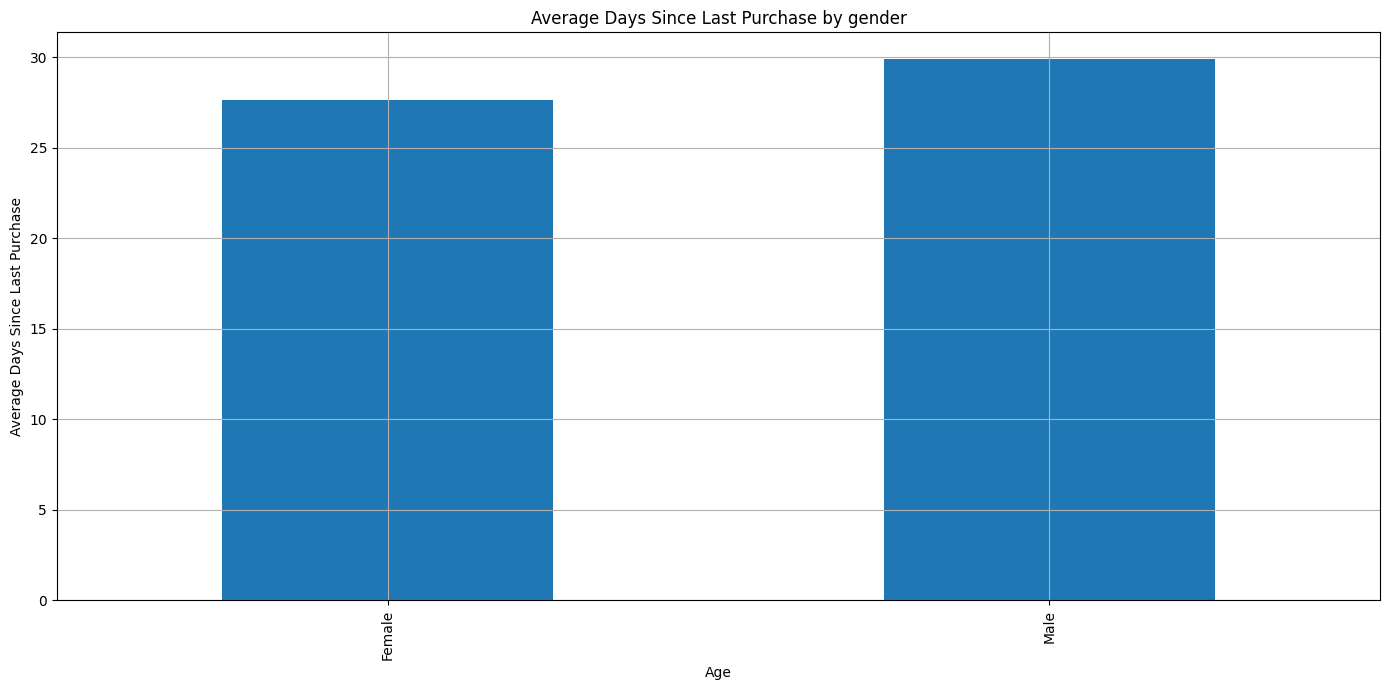

In [24]:
average_days_since_last_purchase_by_age = df.groupby('gender')['days_since_last_purchase'].mean()

plt.figure(figsize=(14, 7))
average_days_since_last_purchase_by_age.plot(kind='bar')
plt.title('Average Days Since Last Purchase by gender')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

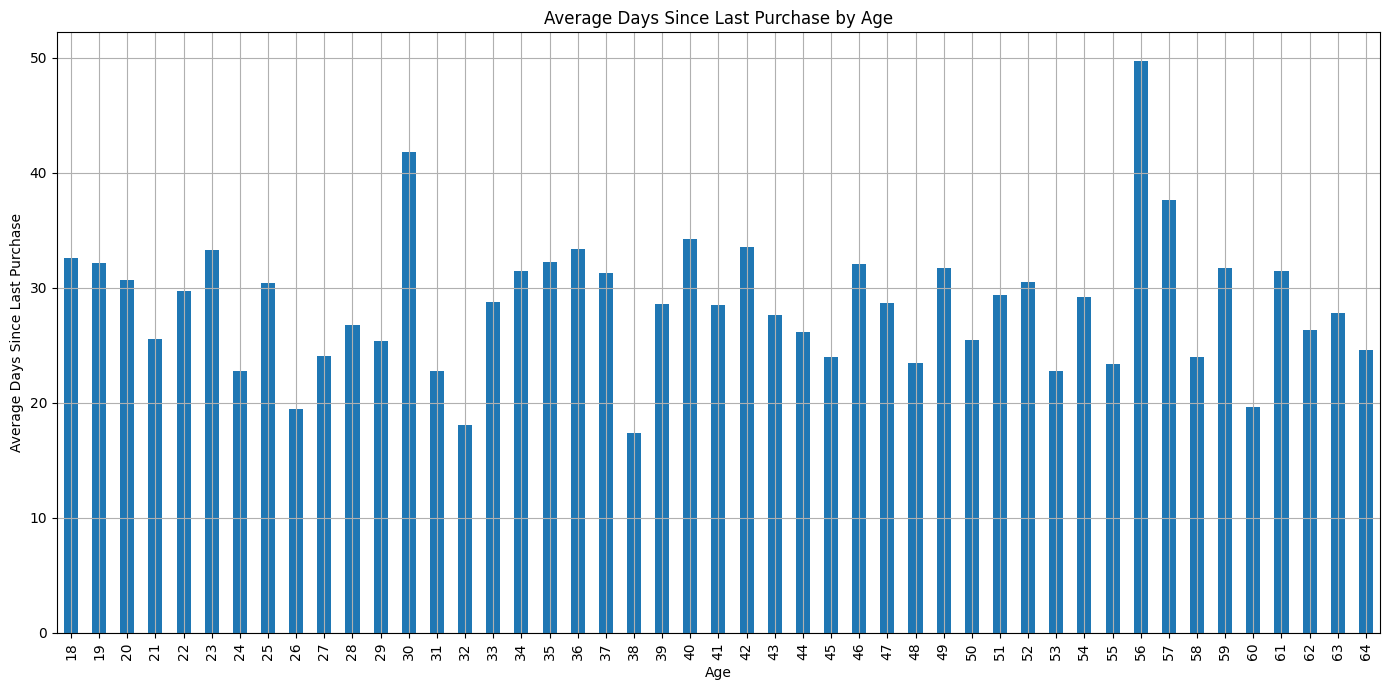

In [25]:
average_days_since_last_purchase_by_age = df.groupby('age')['days_since_last_purchase'].mean()

plt.figure(figsize=(14, 7))
average_days_since_last_purchase_by_age.plot(kind='bar')
plt.title('Average Days Since Last Purchase by Age')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

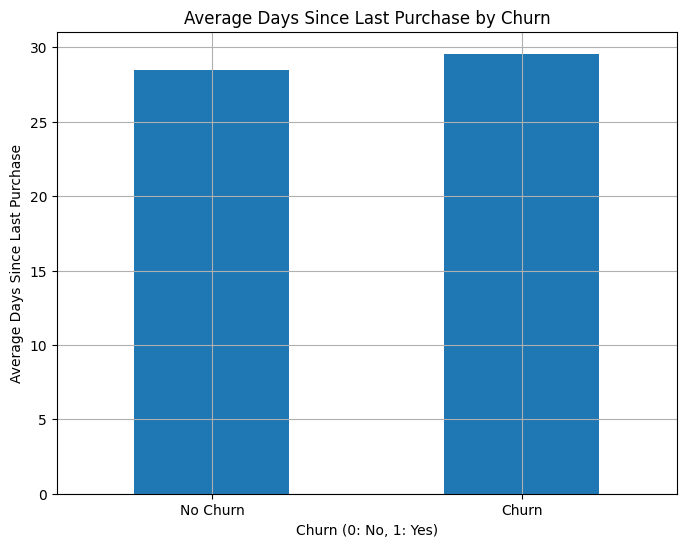

In [26]:
average_days_since_last_purchase_by_churn = df.groupby('churn')['days_since_last_purchase'].mean()

plt.figure(figsize=(8, 6))
average_days_since_last_purchase_by_churn.plot(kind='bar')
plt.title('Average Days Since Last Purchase by Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.grid(True)
plt.show()

## customer satisfaction

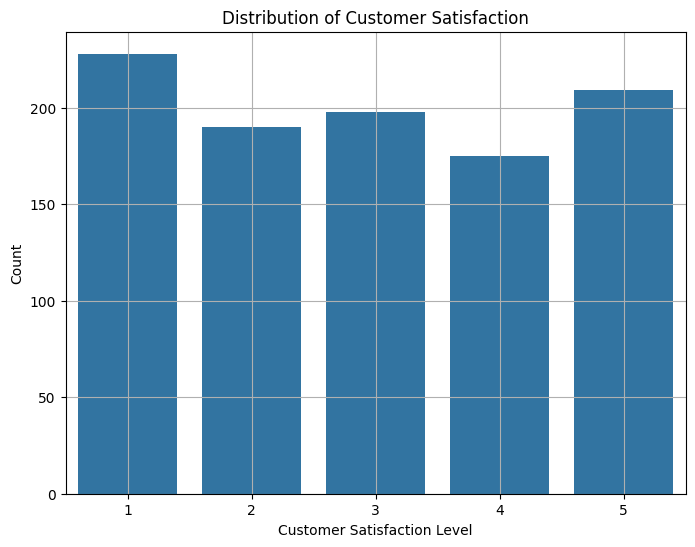

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_satisfaction')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

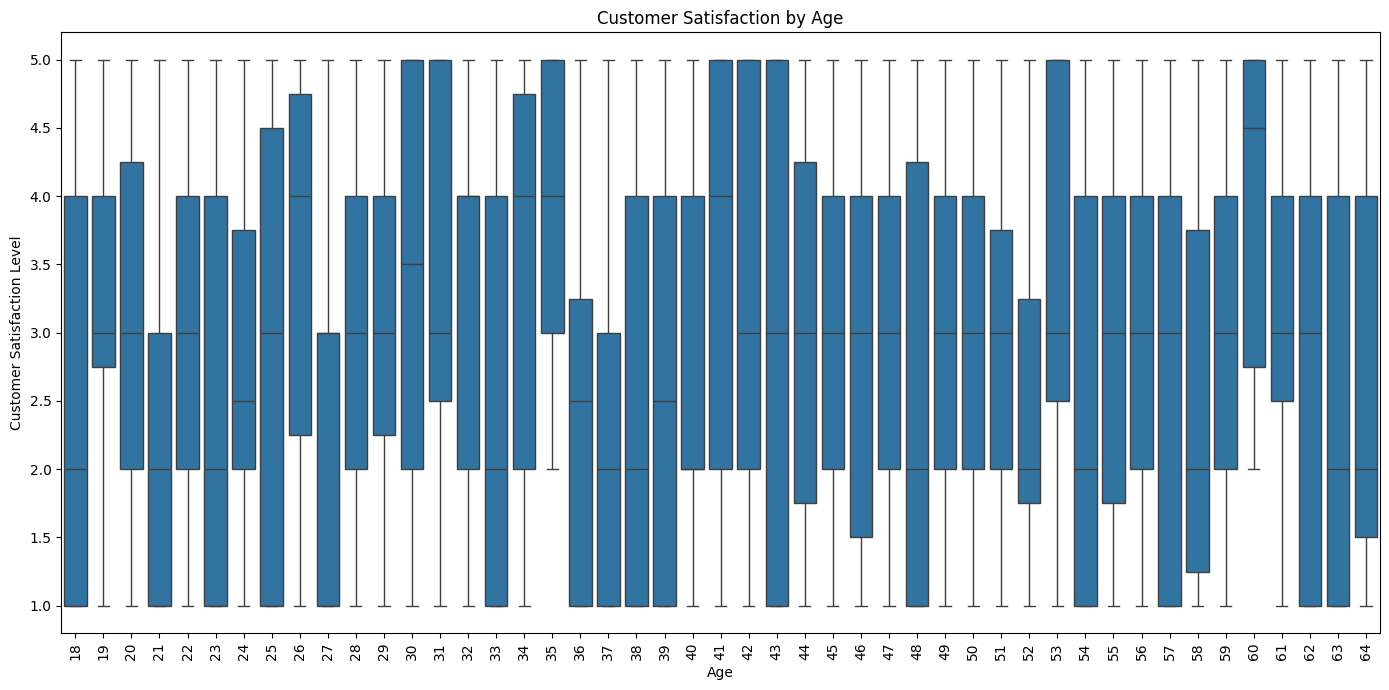

In [28]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='age', y='customer_satisfaction')
plt.title('Customer Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Customer Satisfaction Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

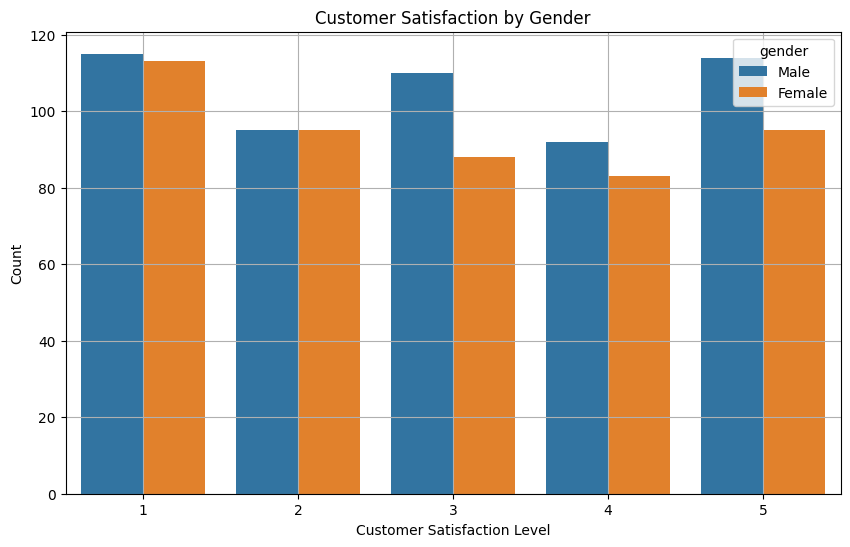

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_satisfaction', hue='gender')
plt.title('Customer Satisfaction by Gender')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

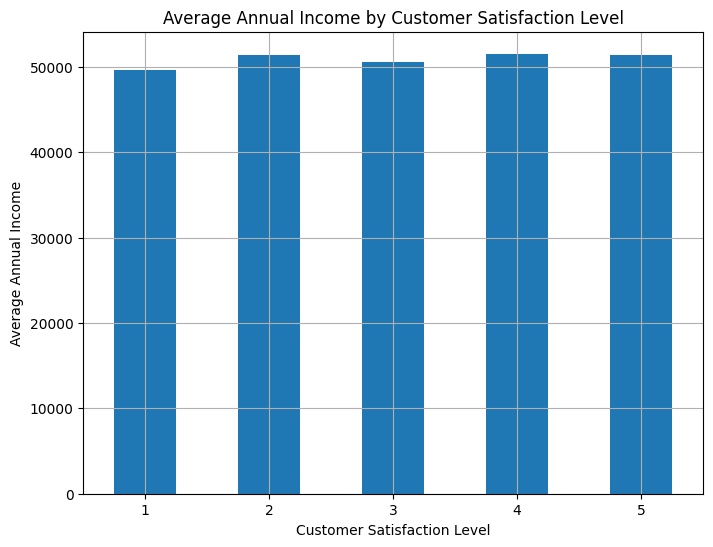

In [30]:
average_income_by_satisfaction = df.groupby('customer_satisfaction')['annual_income'].mean()

plt.figure(figsize=(8, 6))
average_income_by_satisfaction.plot(kind='bar')
plt.title('Average Annual Income by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Annual Income')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

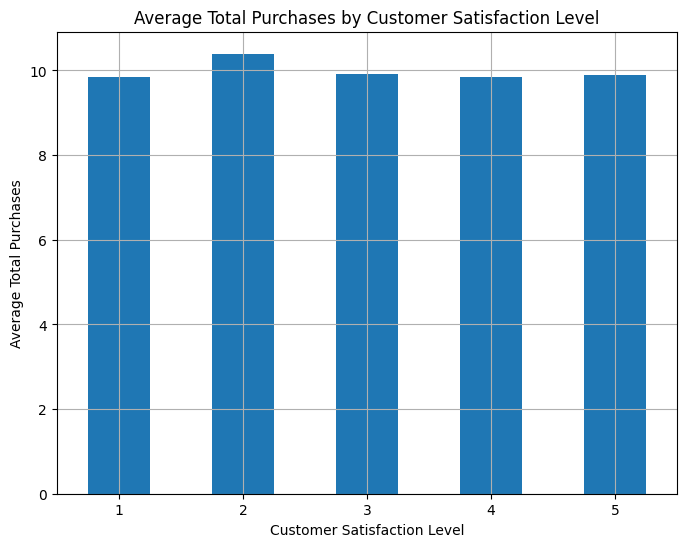

In [31]:
average_purchases_by_satisfaction = df.groupby('customer_satisfaction')['total_purchases'].mean()

plt.figure(figsize=(8, 6))
average_purchases_by_satisfaction.plot(kind='bar')
plt.title('Average Total Purchases by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Total Purchases')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

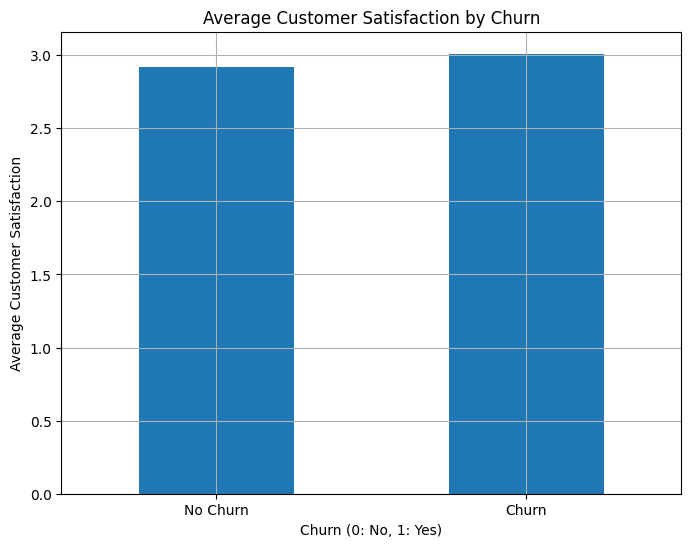

In [32]:
average_satisfaction_by_churn = df.groupby('churn')['customer_satisfaction'].mean()

plt.figure(figsize=(8, 6))
average_satisfaction_by_churn.plot(kind='bar')
plt.title('Average Customer Satisfaction by Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Average Customer Satisfaction')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.grid(True)
plt.show()

## churn

In [33]:
df['churn'].unique()

array([0, 1])

In [34]:
df['churn'].value_counts()

,count
churn,
0,690
1,310


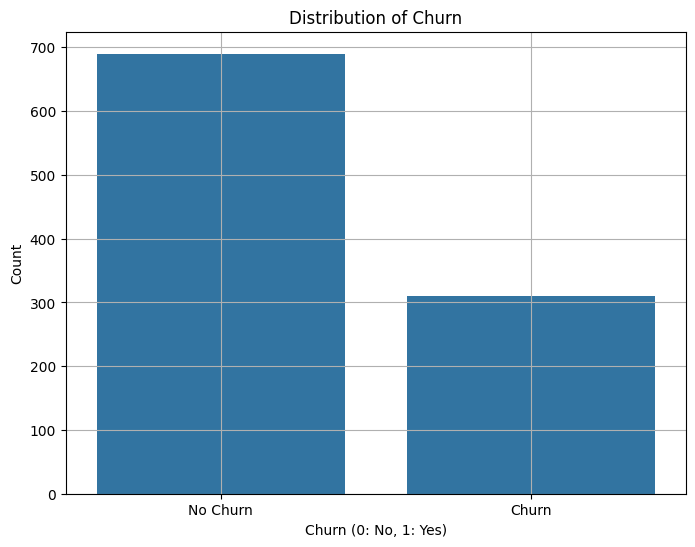

In [35]:
churn_counts = df['churn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(True)
plt.show()

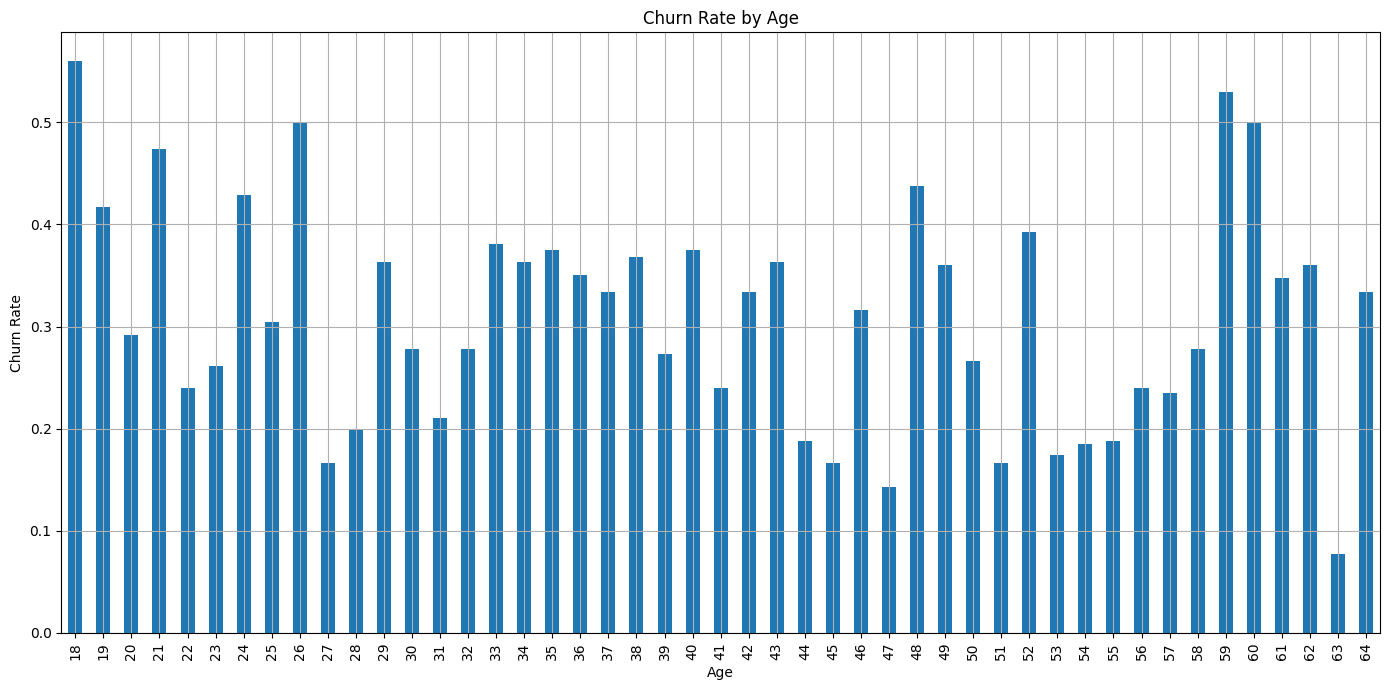

In [36]:
churn_by_age = df.groupby('age')['churn'].mean()

plt.figure(figsize=(14, 7))
churn_by_age.plot(kind='bar')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

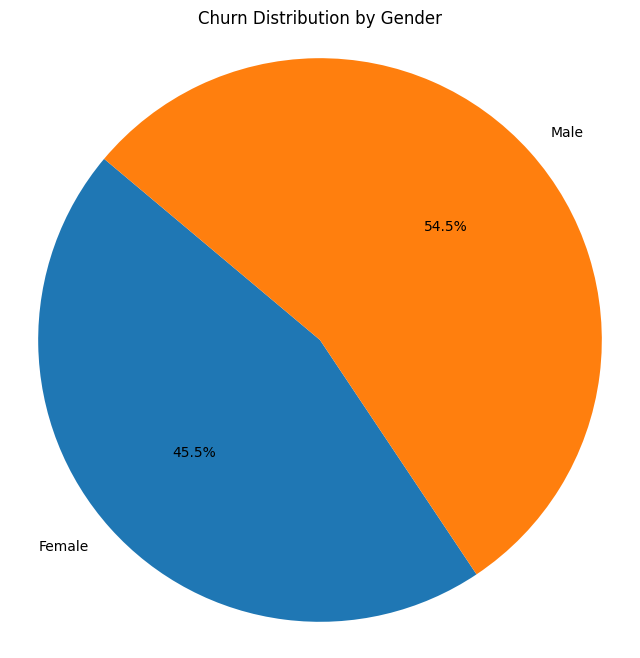

In [37]:
churn_by_gender_counts = df.groupby('gender')['churn'].sum()

plt.figure(figsize=(8, 8))
plt.pie(churn_by_gender_counts.values, labels=churn_by_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Gender')
plt.axis('equal')
plt.show()

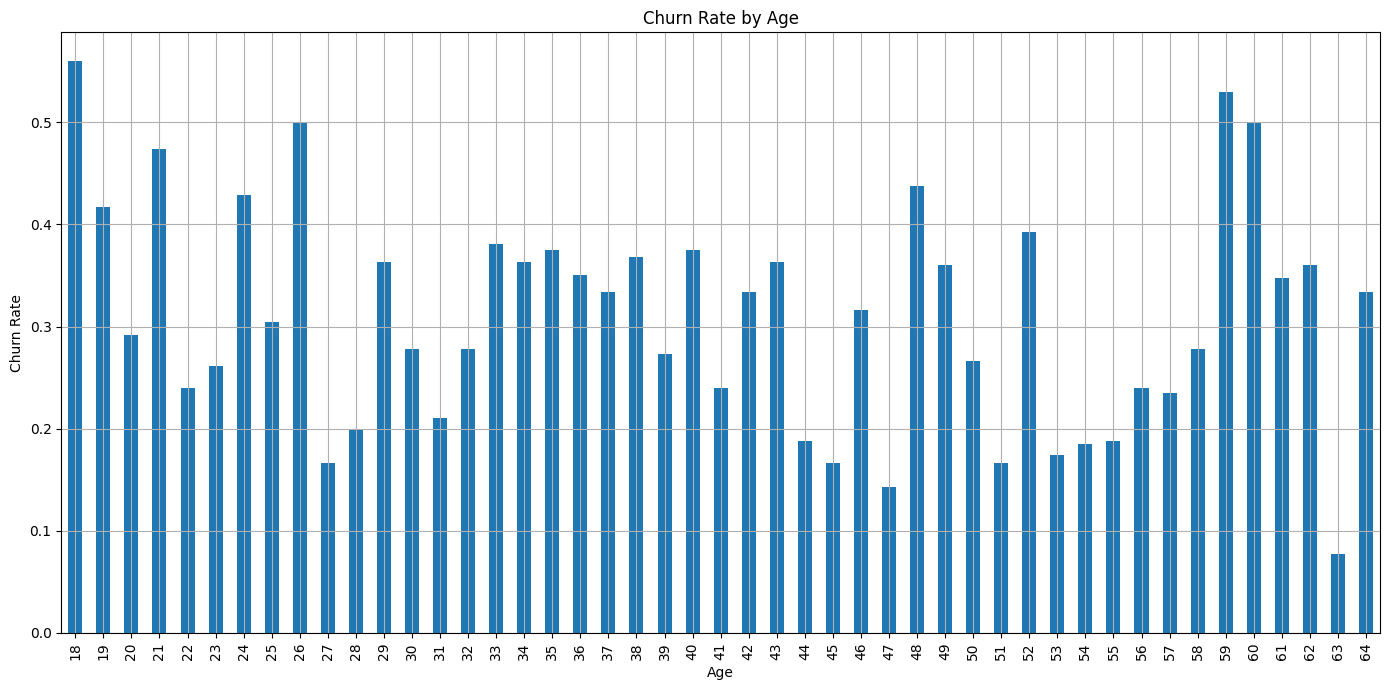

In [38]:
churn_by_age = df.groupby('age')['churn'].mean()

plt.figure(figsize=(14, 7))
churn_by_age.plot(kind='bar')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## preprocessing

In [39]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2, random_state=42)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       800 non-null    int64  
 1   gender                    800 non-null    object 
 2   annual_income             800 non-null    int64  
 3   total_purchases           800 non-null    int64  
 4   avg_purchase_value        800 non-null    float64
 5   days_since_last_purchase  800 non-null    int64  
 6   customer_satisfaction     800 non-null    int64  
 7   churn                     800 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 56.2+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       200 non-null    int64  
 1   gender                    200 non-null    object 
 2   annual_income             200 non-null    int64  
 3   total_purchases           200 non-null    int64  
 4   avg_purchase_value        200 non-null    float64
 5   days_since_last_purchase  200 non-null    int64  
 6   customer_satisfaction     200 non-null    int64  
 7   churn                     200 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 14.1+ KB


In [42]:
train.head()

,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
29,44,Female,56715,8,175.71,14,1,0
535,38,Female,58828,12,63.77,13,4,1
695,45,Male,66200,11,46.30,18,3,0
557,47,Male,23587,19,28.82,17,4,0
836,46,Female,82564,17,71.37,28,5,0


In [43]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(train[['gender']])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['gender']),
    index=train.index
)

train1 = pd.concat([train.drop('gender', axis=1), encoded_df], axis=1)


In [44]:
train1.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn,gender_Female,gender_Male
29,44,56715,8,175.71,14,1,0,1.0,0.0
535,38,58828,12,63.77,13,4,1,1.0,0.0
695,45,66200,11,46.30,18,3,0,0.0,1.0
557,47,23587,19,28.82,17,4,0,0.0,1.0
836,46,82564,17,71.37,28,5,0,1.0,0.0


In [45]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       800 non-null    int64  
 1   annual_income             800 non-null    int64  
 2   total_purchases           800 non-null    int64  
 3   avg_purchase_value        800 non-null    float64
 4   days_since_last_purchase  800 non-null    int64  
 5   customer_satisfaction     800 non-null    int64  
 6   churn                     800 non-null    int64  
 7   gender_Female             800 non-null    float64
 8   gender_Male               800 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.5 KB


In [46]:
y_cols=train1['churn']

In [47]:
x_cols=train1.drop(columns=['churn'])

In [48]:
x_cols.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,gender_Female,gender_Male
29,44,56715,8,175.71,14,1,1.0,0.0
535,38,58828,12,63.77,13,4,1.0,0.0
695,45,66200,11,46.30,18,3,0.0,1.0
557,47,23587,19,28.82,17,4,0.0,1.0
836,46,82564,17,71.37,28,5,1.0,0.0


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_cols=pd.DataFrame(scaler.fit_transform(x_cols),columns=x_cols.columns)
x_cols.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,gender_Female,gender_Male
0,0.565217,0.550999,0.315789,0.864798,0.062222,0.00,1.0,0.0
1,0.434783,0.574038,0.526316,0.238631,0.057778,0.75,1.0,0.0
2,0.586957,0.654415,0.473684,0.140907,0.080000,0.50,0.0,1.0
3,0.630435,0.189801,0.894737,0.043128,0.075556,0.75,0.0,1.0
4,0.608696,0.832834,0.789474,0.281143,0.124444,1.00,1.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_cols,y_cols,test_size=0.4,random_state=42)

## model training

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred=lr.predict(x_val)
confusion=confusion_matrix(y_pred,y_val)
classification=classification_report(y_pred,y_val)
roc=roc_auc_score(y_val,y_pred)
scores=cross_val_score(lr,x_train,y_train,cv=5,scoring='roc_auc')
print('confusion_matrix:',confusion)
print('classification_report:',classification)
print('roc_auc_scores:',roc)
print('cross_val_scores:',scores)
print('mean scores:',scores.mean())

confusion_matrix: [[223  97]
 [  0   0]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.70      0.82       320
           1       0.00      0.00      0.00         0

    accuracy                           0.70       320
   macro avg       0.50      0.35      0.41       320
weighted avg       1.00      0.70      0.82       320

roc_auc_scores: 0.5
cross_val_scores: [0.56414141 0.43939394 0.59545455 0.50353535 0.50050505]
mean scores: 0.5206060606060605


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## balancing classes

In [53]:
!pip install imbalanced-learn --quiet

In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train,y_train)

In [55]:
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression()
lr2.fit(x_resampled,y_resampled)

LogisticRegression()

In [56]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred2=lr2.predict(x_val)
confusion=confusion_matrix(y_pred2,y_val)
classification=classification_report(y_pred2,y_val)
roc=roc_auc_score(y_val,y_pred2)
scores=cross_val_score(lr2,x_resampled,y_resampled,cv=5,scoring='roc_auc')
print(confusion)
print(classification)
print(roc)
print(scores)
print(scores.mean())

[[110  54]
 [113  43]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.57       164
           1       0.44      0.28      0.34       156

    accuracy                           0.48       320
   macro avg       0.47      0.47      0.45       320
weighted avg       0.47      0.48      0.46       320

0.4682862558365309
[0.50298439 0.59641873 0.62764004 0.46579431 0.51767677]
0.5421028466483012


In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_resampled,y_resampled)

DecisionTreeClassifier(random_state=42)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred3=dtc.predict(x_val)
confusion=confusion_matrix(y_pred3,y_val)
classification=classification_report(y_pred3,y_val)
roc=roc_auc_score(y_val,y_pred3)
scores=cross_val_score(dtc,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[150  67]
 [ 73  30]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       217
           1       0.31      0.29      0.30       103

    accuracy                           0.56       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.56      0.56      0.56       320

0.4909620452128889
[0.53030303 0.61363636 0.66666667 0.63636364 0.70454545]
0.6303030303030303


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbs=GradientBoostingClassifier(random_state=42)
gbs.fit(x_resampled,y_resampled)

GradientBoostingClassifier(random_state=42)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred5=gbs.predict(x_val)
confusion=confusion_matrix(y_pred5,y_val)
classification=classification_report(y_pred5,y_val)
roc=roc_auc_score(y_val,y_pred5)
scores=cross_val_score(gbs,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[162  79]
 [ 61  18]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       241
           1       0.19      0.23      0.20        79

    accuracy                           0.56       320
   macro avg       0.46      0.45      0.45       320
weighted avg       0.59      0.56      0.58       320

0.4560122047062087
[0.56152433 0.58241506 0.82988981 0.84274564 0.84067952]
0.7314508723599633


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

param_grid_gbs = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid_search_gbs = GridSearchCV(estimator=gbs, param_grid=param_grid_gbs, cv=5, scoring='roc_auc', n_jobs=-1)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

grid_search_gbs.fit(x_resampled, y_resampled, sample_weight=sample_weights)

print("Best parameters found for Gradient Boosting: ", grid_search_gbs.best_params_)
print("Best ROC-AUC score found for Gradient Boosting: ", grid_search_gbs.best_score_)

Best parameters found for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC score found for Gradient Boosting:  0.788475665748393


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbs2=GradientBoostingClassifier(random_state=42,
                                learning_rate=0.2,
                                max_depth=5,
                                min_samples_leaf=1,
                                min_samples_split=4,
                                n_estimators=200
                                )
gbs2.fit(x_resampled,y_resampled)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=4,
                           n_estimators=200, random_state=42)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred5=gbs.predict(x_val)
confusion=confusion_matrix(y_pred5,y_val)
classification=classification_report(y_pred5,y_val)
roc=roc_auc_score(y_val,y_pred5)
scores=cross_val_score(gbs,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[162  79]
 [ 61  18]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       241
           1       0.19      0.23      0.20        79

    accuracy                           0.56       320
   macro avg       0.46      0.45      0.45       320
weighted avg       0.59      0.56      0.58       320

0.4560122047062087
[0.56152433 0.58241506 0.82988981 0.84274564 0.84067952]
0.7314508723599633


In [ ]:
encoded_test = encoder.transform(test[['gender']])

In [ ]:
encoded_test_df = pd.DataFrame(
    encoded_test,
    columns=encoder.get_feature_names_out(['gender']),
    index=test.index
)

In [ ]:
test1 = pd.concat([test.drop('gender', axis=1), encoded_test_df], axis=1)

In [ ]:

x_test = test1.drop(columns=['churn'])

In [ ]:
y_test = test1['churn']


In [ ]:

x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [64]:

y_pred_gbs2_test = gbs2.predict(x_test_scaled)

confusion_gbs2_test = confusion_matrix(y_test, y_pred_gbs2_test)
classification_gbs2_test = classification_report(y_test, y_pred_gbs2_test)
roc_auc_gbs2_test = roc_auc_score(y_test, y_pred_gbs2_test)


print("Confusion Matrix (gbs2 on test data):\n", confusion_gbs2_test)
print("\nClassification Report (gbs2 on test data):\n", classification_gbs2_test)
print("\nROC-AUC Score (gbs2 on test data):", roc_auc_gbs2_test)

Confusion Matrix (gbs2 on test data):
 [[103  34]
 [ 48  15]]

Classification Report (gbs2 on test data):
               precision    recall  f1-score   support

           0       0.68      0.75      0.72       137
           1       0.31      0.24      0.27        63

    accuracy                           0.59       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.56      0.59      0.57       200


ROC-AUC Score (gbs2 on test data): 0.49496002780674314
